In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import numpy as np
from sklearn import tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import matplotlib.pyplot  as pt

In [30]:
col_names=['pregnent','glucose','bp','skin','insulin','bmi','pedigree','age','label']

In [31]:
dataset=pd.read_csv("diabetes.csv")

In [32]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
dataset.columns=col_names

In [34]:
feature_cols=['pregnent','glucose','bp','skin','insulin','bmi','pedigree']

In [35]:
X=dataset[feature_cols]

In [36]:
y=dataset.label

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [38]:
clf=DecisionTreeClassifier()

In [39]:
clf=clf.fit(X_train,y_train)

In [40]:
y_pred=clf.predict(X_test)

In [41]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.6363636363636364


[Text(181.80717807424594, 210.192, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(92.07485498839907, 195.696, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(35.5385150812065, 181.2, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(29.32412993039443, 166.704, 'X[1] <= 114.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(26.2169373549884, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(32.431322505800466, 152.208, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(41.75290023201856, 166.704, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(38.64570765661253, 152.208, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(44.86009280742459, 152.208, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(41.75290023201856, 137.712, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(47.967285382830624, 137.712, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(148.61119489559164

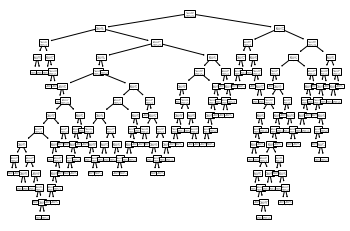

In [42]:
tree.plot_tree(clf)

In [58]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred))

In [59]:
cm

array([[107,  39],
       [ 45,  40]], dtype=int64)

<AxesSubplot:>

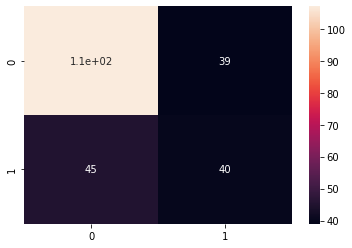

In [60]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot:>

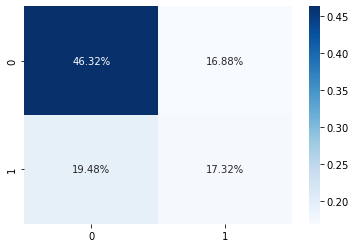

In [61]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [62]:
# Making a heatmap with labels:

<AxesSubplot:>

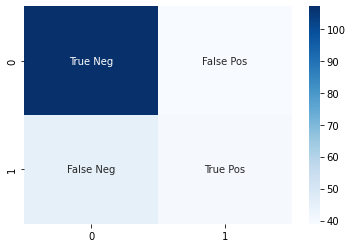

In [77]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

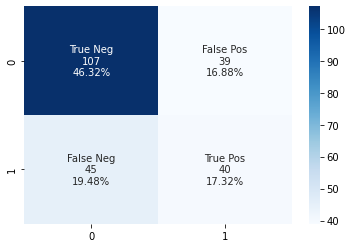

In [82]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

Arguments
---------
cf:            confusion matrix to be passed in

group_names:   List of strings that represent the labels row by row
               to be shown in each square.

categories:    List of strings containing the categories to be
               displayed on the x,y axis. Default is 'auto'

count:         If True, show the raw number in the confusion matrix.
               Default is True.

normalize:     If True, show the proportions for each category.
               Default is True.

cbar:          If True, show the color bar. The cbar values are
               based off the values in the confusion matrix.
               Default is True.

xyticks:       If True, show x and y ticks. Default is True.

xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on
               the figure. Default is True.

sum_stats:     If True, display summary statistics below the figure.
               Default is True.

figsize:       Tuple representing the figure size. Default will be
               the matplotlib rcParams value.

cmap:          Colormap of the values displayed from
               matplotlib.pyplot.cm. Default is 'Blues'

In [ ]:
# https://www.kaggle.com/code/agungor2/various-confusion-matrix-plots/notebook

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       146
           1       0.51      0.47      0.49        85

    accuracy                           0.64       231
   macro avg       0.61      0.60      0.60       231
weighted avg       0.63      0.64      0.63       231

